In [55]:
import pandas as pd
import numpy as np

In [56]:
data = pd.read_csv("../Data/clean/CDC/CDCSTDoverall2000_2020_clean.csv")

In [57]:
data.head()

,Unnamed: 0.1,year,geography,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,...,rate_per_100000_male_gonorrhea_multiracial,rate_per_100000_male_gonorrhea_native_hawaiian_other_pacific_islander,rate_per_100000_male_gonorrhea_white,rate_per_100000_male_primary_and_secondary_syphilis_american_indian_alaska_native,rate_per_100000_male_primary_and_secondary_syphilis_asian,rate_per_100000_male_primary_and_secondary_syphilis_black_african_american,rate_per_100000_male_primary_and_secondary_syphilis_hispanic_latino,rate_per_100000_male_primary_and_secondary_syphilis_multiracial,rate_per_100000_male_primary_and_secondary_syphilis_native_hawaiian_other_pacific_islander,rate_per_100000_male_primary_and_secondary_syphilis_white
0,0,2000,"Abbeville County, SC",45001,61.0,1.0,57.0,2.0,232.6,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000,"Acadia Parish, LA",22001,0.0,8.0,0.0,11.0,0.0,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2000,"Accomack County, VA",51001,153.0,2.0,88.0,0.0,398.7,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000,"Ada County, ID",16001,644.0,0.0,33.0,1.0,212.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2000,"Adair County, IA",19001,8.0,0.0,0.0,0.0,97.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()

/var/folders/zl/tww5174129gdj_kds5bh2xx80000gn/T/ipykernel_2939/3700150800.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()


In [24]:
df_sum.head()

,year,cases_gonorrhea,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_primary_and_secondary_syphilis
0,2000,211146.0,382937.0,9989.0,6117.0
1,2001,245376.0,487710.0,9262.0,6287.0
2,2002,345771.0,813734.0,9064.0,7089.0
3,2003,332157.0,869687.0,8989.0,7352.0
4,2004,327207.0,921261.0,8101.0,8152.0


### Chlamydia time series

In [25]:
df = df_sum[['year','cases_chlamydia']]

In [26]:
df = df.drop(labels=[20,0,1], axis=0)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns 

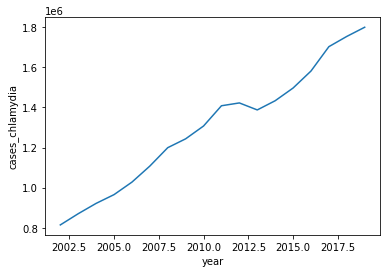

In [28]:
sns.lineplot(data = df,x="year",y="cases_chlamydia")
plt.show()

In [29]:
from scipy import signal

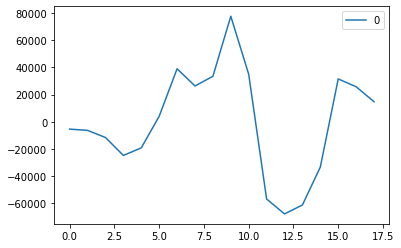

In [30]:
detrended = signal.detrend(df.cases_chlamydia)
detrended_df = pd.DataFrame(detrended)
detrended_df.plot()
plt.show()

In [31]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/opt/homebrew/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


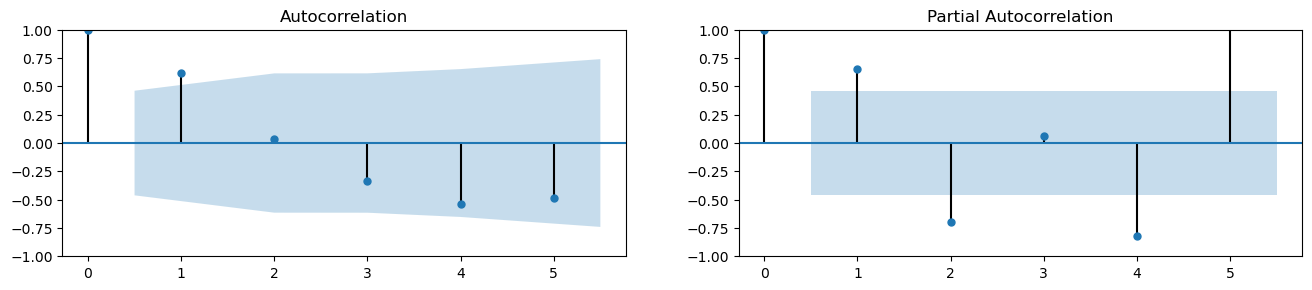

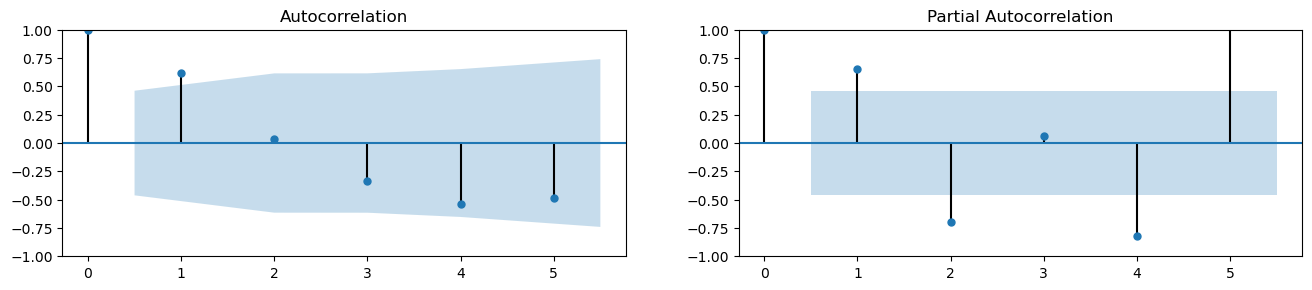

In [32]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(detrended_df[0].tolist(), lags=5, ax=axes[0])
plot_pacf(detrended_df[0].tolist(), lags=5, ax=axes[1])

In [37]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(detrended_df[0], order=(0,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# pyplot.show()
# # summary stats of residuals
# print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -201.543
Date:                Wed, 13 Jul 2022   AIC                            405.086
Time:                        15:49:28   BIC                            405.920
Sample:                             0   HQIC                           405.169
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.095e+09   2.76e+08      3.967      0.000    5.54e+08    1.64e+09
Ljung-Box (L1) (Q):                   1.48   Jarque-Bera (JB):                 2.92
Prob(Q):                              0.22   Pr

In [44]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(detrended_df[0], order=(2,2,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -190.501
Date:                Wed, 13 Jul 2022   AIC                            387.001
Time:                        15:50:26   BIC                            389.319
Sample:                             0   HQIC                           387.120
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1711      0.280     -0.611      0.541      -0.720       0.378
ar.L2         -0.5816      0.227     -2.561      0.010      -1.027      -0.136
sigma2      1.452e+09   4.83e-11   3.01e+19      0.0

### Gonorrhea time series

In [45]:
df = df_sum[['year','cases_gonorrhea']]

In [46]:
df = df.drop(labels=[20,0,1], axis=0)

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns 

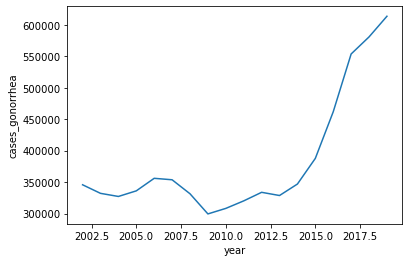

In [48]:
sns.lineplot(data = df,x="year",y="cases_gonorrhea")
plt.show()

In [49]:
from scipy import signal

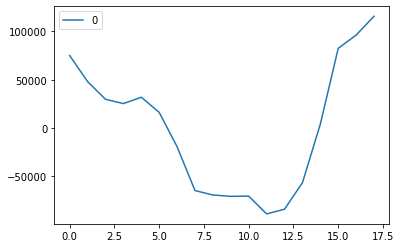

In [50]:
detrended = signal.detrend(df.cases_gonorrhea)
detrended_df = pd.DataFrame(detrended)
detrended_df.plot()
plt.show()

In [51]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/opt/homebrew/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


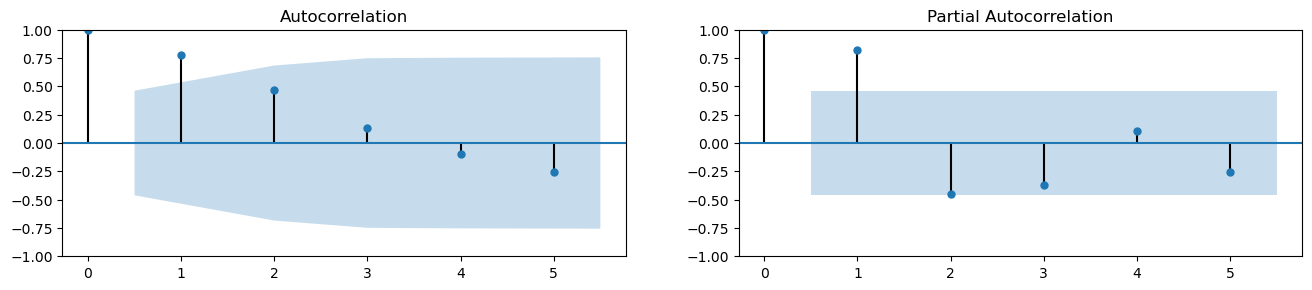

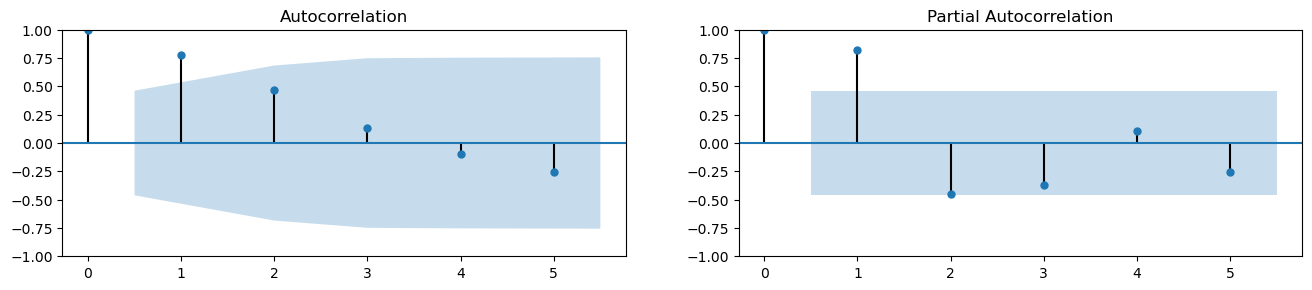

In [52]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(detrended_df[0].tolist(), lags=5, ax=axes[0])
plot_pacf(detrended_df[0].tolist(), lags=5, ax=axes[1])

In [53]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(detrended_df[0], order=(2,2,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# pyplot.show()
# # summary stats of residuals
# print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -184.341
Date:                Wed, 13 Jul 2022   AIC                            374.682
Time:                        15:51:03   BIC                            377.000
Sample:                             0   HQIC                           374.801
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0968      0.309     -0.313      0.754      -0.703       0.509
ar.L2         -0.1754      0.265     -0.661      0.508      -0.695       0.345
sigma2      6.365e+08    1.7e-10   3.74e+18      0.0

In [54]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(detrended_df[0], order=(0,2,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -184.868
Date:                Wed, 13 Jul 2022   AIC                            371.735
Time:                        15:51:07   BIC                            372.508
Sample:                             0   HQIC                           371.775
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.612e+08   1.55e+08      3.618      0.000    2.57e+08    8.65e+08
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.33
Prob(Q):                              0.94   Pr